In [1]:
#importing libraries
import numpy as np


In [2]:
#convert model from keras to tf-lite
model = keras.models.load_model('./models/dogs_cats_10_0.687.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with tf.io.gfile.GFile('dogs_cats_v1.tflite', 'wb') as f:
    f.write(tflite_model)

NameError: name 'keras' is not defined

In [3]:
import tflite_runtime.interpreter as tflite
#pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime  

In [4]:
interpreter = tflite.Interpreter(model_path='.\models\dogs_cats_v1.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
input_index = input_details[0]['index']

output_details = interpreter.get_output_details()
output_index = output_details[0]['index']

print("Input details")
print(output_details)

print("Output details")
print(output_details)

Input details
[{'name': 'StatefulPartitionedCall:0', 'index': 13, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details
[{'name': 'StatefulPartitionedCall:0', 'index': 13, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [5]:
#code for downloading the image to be used in our model
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img
    

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [6]:
#lets test with the following image
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'
img = download_image(url)
img.show()

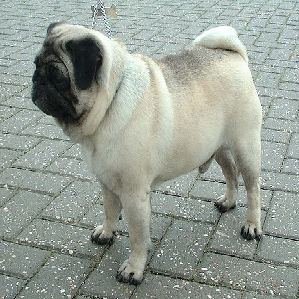

In [9]:
image_size = (299, 299)
img = prepare_image(img, target_size = image_size)
img

In [10]:
from keras_image_helper import create_preprocessor

In [11]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))
X = preprocessor.from_url(url)

In [20]:
X[0][:][:][0]

array([[ 0.41176474,  0.54509807,  0.49803925],
       [ 0.38823533,  0.52156866,  0.45882356],
       [ 0.26274514,  0.39607847,  0.33333337],
       [ 0.21568632,  0.34901965,  0.27058828],
       [ 0.24705887,  0.37254906,  0.28627455],
       [ 0.00392163,  0.13725495,  0.09019613],
       [ 0.10588241,  0.254902  ,  0.22352946],
       [ 0.05882359,  0.20784318,  0.17647064],
       [ 0.12941182,  0.27843142,  0.26274514],
       [ 0.5137255 ,  0.67058825,  0.6784314 ],
       [ 0.20000005,  0.35686278,  0.34901965],
       [ 0.39607847,  0.56078434,  0.52156866],
       [ 0.37254906,  0.5372549 ,  0.4666667 ],
       [ 0.1686275 ,  0.3176471 ,  0.27058828],
       [ 0.24705887,  0.39607847,  0.36470592],
       [ 0.36470592,  0.4901961 ,  0.48235297],
       [ 0.41176474,  0.5294118 ,  0.5058824 ],
       [ 0.41176474,  0.5372549 ,  0.5137255 ],
       [ 0.34901965,  0.49803925,  0.4666667 ],
       [ 0.41176474,  0.56078434,  0.5294118 ],
       [ 0.5921569 ,  0.7254902 ,  0.662

In [12]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [13]:
preds

array([[0.97000027]], dtype=float32)